<a href="https://colab.research.google.com/github/abhijeetk597/bi-dashboards/blob/main/AtliQ_Hotels_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AtliQ Hotels Data Analysis Project**

> AtliQ Hotels is a luxury hotels chain in India spread across 4 cities, viz Mumbai, Delhi, Hyderabad and Banglore. They are witnessing a drop in business and hence they have made available 3 months dataset from May 2022 to July 2022 for analysis. Data for August 2022 is separately given.

> The objective of this notebook is to analyse thier data and present data driven insights.

[1. Data Import and Data Exploration](#data)

[2. Data Cleaning](#cleaning)

[3. Data Transformation](#transformation)

[4. Analysis Insights](#insights)

In [ ]:
import pandas as pd

***
## **<a name="data">1. Data Import and Data Exploration</a>**
***

### Datasets

We have 6 csv files
- dim_date.csv
- dim_hotels.csv
- dim_rooms.csv
- fact_aggregated_bookings.csv
- fact_bookings.csv
- new_data_august.csv

### **1.1 Importing all datasets**

In [ ]:
df_date = pd.read_csv("dim_date.csv")
df_hotels = pd.read_csv("dim_hotels.csv")
df_rooms = pd.read_csv("dim_rooms.csv")
df_agg_bookings = pd.read_csv("fact_aggregated_bookings.csv")
df_bookings = pd.read_csv("fact_bookings.csv")
df_august = pd.read_csv("new_data_august.csv")

### **1.2 Explore `dim_date` table**

In [ ]:
# DataFrame
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [ ]:
# info
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


- Format of the `date` column is `object`. Needs to be converted to `datetime`
- There are no null values

In [ ]:
df_date.date = pd.to_datetime(df_date.date)
df_date.dtypes

date        datetime64[ns]
mmm yy              object
week no             object
day_type            object
dtype: object

In [ ]:
# date range
df_date.date.max(), df_date.date.min()

(Timestamp('2022-07-31 00:00:00'), Timestamp('2022-05-01 00:00:00'))

- Date in this table ranges from `May 2022` to `July 2022`

In [ ]:
# monthwise value counts
df_date["mmm yy"].value_counts()

May 22    31
Jul 22    31
Jun 22    30
Name: mmm yy, dtype: int64

### **1.3 Explore `dim_hotels` table**

In [ ]:
# head
df_hotels

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [ ]:
# duplicate rows
df_hotels.duplicated().sum()

0

In [ ]:
# no of unique properties/names/category/city
print("Unique counts related to 'dim_hotels' table")
for column in df_hotels.columns:
  print(f"{column} --> {df_hotels[column].nunique()}")

Unique counts related to 'dim_hotels' table
property_id --> 25
property_name --> 7
category --> 2
city --> 4


In [ ]:
# citywise no of properties
df_hotels.city.value_counts()

Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: city, dtype: int64

<Axes: >

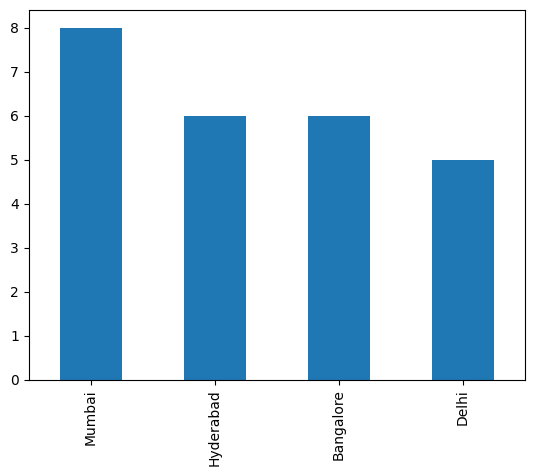

In [ ]:
df_hotels.city.value_counts().plot(kind="bar")

In [ ]:
# category wise count
df_hotels.category.value_counts()

Luxury      16
Business     9
Name: category, dtype: int64

- No duplicates rows
- AtliQ Hotes has **25 properties** spread across **4 cities** viz. Mumbai, Hyderabad, Banglore & Delhi
- There are **16 Luxury and 9 Business** properties.


### **1.4 Explore `dim_rooms` table**

In [ ]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


- There are 4 types of rooms in AtliQ Hotels

### **1.5 Explore `fact_aggregated_bookings` data**

In [ ]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [ ]:
df_agg_bookings[df_agg_bookings.check_in_date == "1-May-22"]

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
95,18563,1-May-22,RT4,13,18.0
96,16563,1-May-22,RT4,17,18.0
97,16559,1-May-22,RT4,17,18.0
98,17561,1-May-22,RT4,3,4.0


In [ ]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9198 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 359.5+ KB


- In `capacity` column we have 2 `null` values

In [ ]:
df_agg_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


**Q 1. Find out unique property ids in aggregate bookings dataset**

In [ ]:
df_agg_bookings.property_id.unique(), df_agg_bookings.property_id.nunique()

(array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
        16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
        18561, 18562, 18563, 19559, 19561, 17564, 18560]),
 25)

**Q 2. Find out total bookings per property_id**

In [ ]:
df_agg_bookings.groupby("property_id").successful_bookings.sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

**Q 3. Find out days on which bookings are greater than capacity**

In [ ]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity].check_in_date

3        1-May-22
12       1-May-22
4136    11-Jun-22
6209     2-Jul-22
8522    25-Jul-22
9194    31-Jul-22
Name: check_in_date, dtype: object

**Q 4. Find out properties that have highest capacity**

In [258]:
df_agg_bookings[df_agg_bookings.capacity == df_agg_bookings.capacity.max()].groupby("property_id")["capacity"].max()

property_id
17558    50.0
Name: capacity, dtype: float64

### **1.6 Explore `fact_bookings` data**

In [ ]:
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [ ]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 12.3+ MB


In [ ]:
df_bookings.duplicated().sum()

0

In [ ]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                3
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

- No duplicate records
- 1,34,590 unique booking entries
- Two columns `no_guests` and `ratings_given` have 3 & 77907 `nan` values respectively
- Dates in the dataframe are in wrong format
- `room_category` in this df is `room_id` in `df_rooms`
- Some `no_guests` values are negative

In [ ]:
# Unique booking platforms
df_bookings.booking_platform.unique(), df_bookings.booking_platform.nunique()

(array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
        'journey', 'direct offline'], dtype=object),
 7)

In [ ]:
# Value counts per booking platforms
df_bookings.booking_platform.value_counts()

others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: booking_platform, dtype: int64

<Axes: >

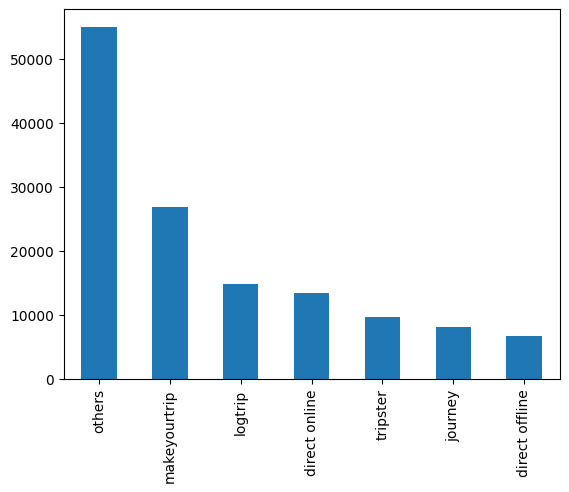

In [ ]:
df_bookings.booking_platform.value_counts().plot(kind="bar")

<Axes: >

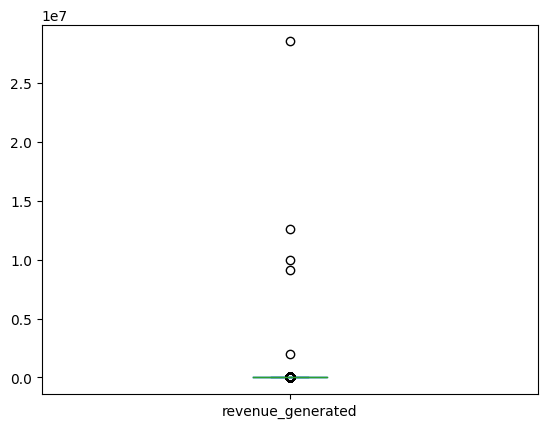

In [ ]:
# Check outliers
df_bookings.revenue_generated.plot(kind='box')

<Axes: >

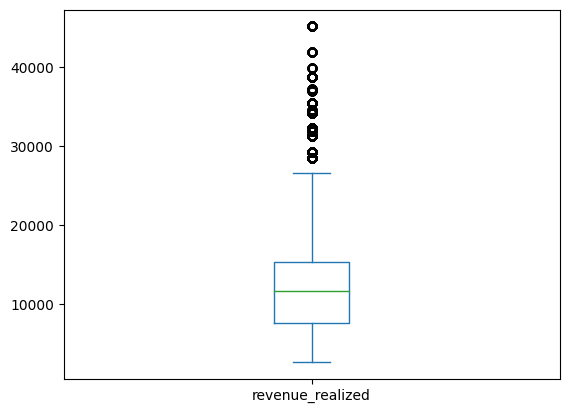

In [ ]:
df_bookings.revenue_realized.plot(kind='box')

- From Boxplots we can see outliers are there in `revenue_generated` and `revenue_realized` columns.

***
## **<a name="cleaning">2. Data Cleaning</a>**
***

In [ ]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


### **2.1 Clean invalid `no_guests`**

In [ ]:
df_invalid_guest = df_bookings[(df_bookings.no_guests <= 0) | (df_bookings.no_guests.isnull())]
df_invalid_guest

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
30,May012216558RT213,16558,29-04-22,1/5/2022,2/5/2022,NaN,RT2,logtrip,4.0,Checked Out,12600,12600
43,May012216558RT35,16558,29-04-22,1/5/2022,4/5/2022,NaN,RT3,others,NaN,Checked Out,18480,18480
46,May012216558RT38,16558,27-04-22,1/5/2022,3/5/2022,NaN,RT3,makeyourtrip,NaN,Checked Out,16800,16800
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500


- Above rows represent data errors.
- Since invalid guest data is less that 0.5 % of the total data, we can ignore them for insights generation.

In [ ]:
df_bookings = df_bookings[(df_bookings.no_guests > 0) & ~(df_bookings.no_guests.isnull())]
df_bookings.shape

(134578, 12)

### **2.2 Outlier removal in `revenue_generated`**

In [ ]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

In [ ]:
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.median()

(15378.036937686695, 13500.0)

In [ ]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()
avg, std

(15378.036937686695, 93040.1549314641)

In [ ]:
higher_limit = avg + 3*std
lower_limit = avg - 3*std
higher_limit, lower_limit

(294498.50173207896, -263742.4278567056)

In [ ]:
# we have no negative value in rev_generated column
df_bookings[df_bookings.revenue_generated > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


We have 5 outliers in `revenue_generated` column and we can ignore them.

In [ ]:
df_bookings = df_bookings[df_bookings.revenue_generated <= higher_limit]
df_bookings.shape

(134573, 12)

### **2.3 Outlier removal in `revenue_realized`**

In [ ]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [ ]:
avg, std = df_bookings.revenue_realized.mean(), df_bookings.revenue_realized.std()
higher_limit = avg + 3*std
lower_limit = avg - 3*std
higher_limit, lower_limit

(33479.358661845814, -8087.391491611072)

In [ ]:
df_bookings[df_bookings.revenue_realized > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [ ]:
df_bookings[df_bookings.revenue_realized > higher_limit].room_category.value_counts()

RT4    1299
Name: room_category, dtype: int64

- One observation we can have in above dataframe is that all rooms are **RT4** type which means **Presidential Suite**. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room type.

In [ ]:
df_bookings[df_bookings.room_category == "RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [ ]:
RT4 = df_bookings[df_bookings.room_category == "RT4"].revenue_realized
avg, std = RT4.mean(), RT4.std()
higher_limit = avg + 3*std
higher_limit

50585.10567100048

- Here higher limit comes to be 50,585 and in our dataframe above we can see that max value for `revenue_realized` is 45,220. Hence, we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column.

### **2.4 Null values in `ratings_given` column**

Since, it is logical that every customer don't provide rating, our `ratings_given` column has null values.

### **2.5 Null values in `df_agg_bookings`**

Q. In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate substitute(possible ways is to use mean or median)

In [ ]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [ ]:
df_agg_bookings[df_agg_bookings.capacity.isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [ ]:
# Let's find out capacity for property_id 17561 with room_type RT1
df_17561_RT1 = df_agg_bookings[(df_agg_bookings.property_id == 17561) & (df_agg_bookings.room_category == "RT1")]
df_17561_RT1.capacity.unique(), df_17561_RT1.capacity.mode()

(array([nan, 26.]),
 0    26.0
 Name: capacity, dtype: float64)

In [ ]:
# Let's find out capacity for property_id 17562 with room_type RT1
df_17562_RT1 = df_agg_bookings[(df_agg_bookings.property_id == 17562) & (df_agg_bookings.room_category == "RT1")]
df_17562_RT1.capacity.unique(), df_17562_RT1.capacity.mode()

(array([nan, 20.]),
 0    20.0
 Name: capacity, dtype: float64)

Here, we have found that
- for `property_id` 17561 and `room_type` RT1 `capacity` is **26**
- for `property_id` 17562 and `room_type` RT1 `capacity` is **20**

Let's replace missing values with actual capacity values.

In [ ]:
def fill_capacity(row):
  if (row.property_id == 17561) & (row.room_category == "RT1"):
    return df_17561_RT1.capacity.median()
  if (row.property_id == 17562) & (row.room_category == "RT1"):
    return df_17562_RT1.capacity.median()

In [ ]:
df_agg_bookings = df_agg_bookings.apply(lambda row: row.fillna(fill_capacity(row)) if row.isnull().sum() == 1 else row, axis=1)
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

### **2.6 `successful_bookings` > `capacity` in `df_agg_bookings`**

Q In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records.

In [ ]:
df_agg_bookings.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity'],
      dtype='object')

In [ ]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


- We have 6 records in `df_agg_bookings` where `successful_bookings` are greater than actual `capacity`, which show presence of data errors.
It's better to filter out those rows from the dataframe for further analysis.

In [ ]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings <= df_agg_bookings.capacity]

***
## **<a name="transformation">3. Data Transformation</a>**
***

### **3.1 Create occupancy percentage column**

In [ ]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


In [ ]:
df_agg_bookings["occ_pct"] = round(df_agg_bookings.successful_bookings*100/df_agg_bookings.capacity,2)
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


### **3.2 cast `dates` to `datetime` format**

In [ ]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


In [ ]:
df_agg_bookings.dtypes

property_id              int64
check_in_date           object
room_category           object
successful_bookings      int64
capacity               float64
occ_pct                float64
dtype: object

In [ ]:
df_agg_bookings.check_in_date = pd.to_datetime(df_agg_bookings.check_in_date)

***
## **<a name="insights">4. Analysis Insights</a>**
***

#### **What is an average occupancy rate in each of the room categories?**

In [ ]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


In [ ]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean()

room_category
RT1    57.893397
RT2    58.009756
RT3    58.028213
RT4    59.277925
Name: occ_pct, dtype: float64

In [ ]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [ ]:
pd.merge(df_rooms, df_agg_bookings.groupby("room_category")["occ_pct"].mean(), left_on="room_id", right_on="room_category").sort_values("occ_pct")

,room_id,room_class,occ_pct
0,RT1,Standard,57.893397
1,RT2,Elite,58.009756
2,RT3,Premium,58.028213
3,RT4,Presidential,59.277925


#### **Print average occupancy rate per city**

In [ ]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [ ]:
df_agg_bookings_city = pd.merge(df_agg_bookings, df_hotels[["property_id", "city"]], on='property_id', how="left")
df_agg_bookings_city.groupby("city")["occ_pct"].mean()

city
Bangalore    56.332376
Delhi        61.507341
Hyderabad    58.120652
Mumbai       57.912110
Name: occ_pct, dtype: float64

#### **When was the occupancy better? Weekday or Weekend?**

In [ ]:
df_date.head(2)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday


In [ ]:
df_agg_bookings.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,2022-05-01,RT1,25,30.0,83.33
1,19562,2022-05-01,RT1,28,30.0,93.33


In [ ]:
df_day_type = pd.merge(df_agg_bookings, df_date, left_on="check_in_date", right_on="date", how="left")
df_day_type.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    51.81
weekend     73.96
Name: occ_pct, dtype: float64

#### **In the month of June, what is the occupancy for different cities?**

In [ ]:
df_agg_bookings_city.check_in_date.dt.month

0       5
1       5
2       5
3       5
4       5
       ..
9189    7
9190    7
9191    7
9192    7
9193    7
Name: check_in_date, Length: 9194, dtype: int64

In [ ]:
df_agg_bookings_city[df_agg_bookings_city.check_in_date.dt.month == 6].groupby("city")["occ_pct"].mean().round(2)

city
Bangalore    55.85
Delhi        61.46
Hyderabad    57.69
Mumbai       57.79
Name: occ_pct, dtype: float64

<Axes: ylabel='city'>

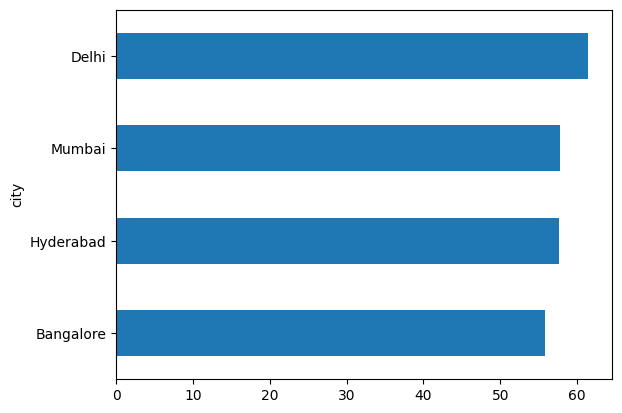

In [ ]:
x = df_agg_bookings_city[df_agg_bookings_city.check_in_date.dt.month == 6].groupby("city")["occ_pct"].mean().round(2)
x.sort_values().plot(kind="barh")

#### **We got new data for the month of August. Append that to existing data.**

In [ ]:
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [ ]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [ ]:
print(df_agg_bookings.columns)
print(df_hotels.columns)
print(df_date.columns)

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct'],
      dtype='object')
Index(['property_id', 'property_name', 'category', 'city'], dtype='object')
Index(['date', 'mmm yy', 'week no', 'day_type'], dtype='object')


In [ ]:
# Create a dataframe having columns from agg_df, hotels_df, date_df
df = pd.merge(df_agg_bookings, df_hotels, on="property_id", how="left")
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date").drop(columns=["date"])

# Transformations on df_august
df_august.rename(columns={"occ%": "occ_pct"}, inplace=True)
df_august.check_in_date = pd.to_datetime(df_august.check_in_date)
df_august.drop(columns=["room_class"], inplace=True)

# Print shapes of both dataframes
df.shape, df_august.shape

((9194, 12), (7, 12))

In [ ]:
latest_df = pd.concat([df, df_august], ignore_index=True, axis=0)
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city,mmm yy,week no,day_type
9191,17558,2022-07-31,RT4,3,6.0,50.00,Atliq Grands,Luxury,Mumbai,Jul 22,W 32,weekend
9192,19563,2022-07-31,RT4,3,6.0,50.00,Atliq Palace,Business,Bangalore,Jul 22,W 32,weekend
9193,17561,2022-07-31,RT4,3,4.0,75.00,Atliq Blu,Luxury,Mumbai,Jul 22,W 32,weekend
9194,16559,2022-08-01,RT1,30,30.0,100.00,Atliq Exotica,Luxury,Mumbai,Aug-22,W 32,weekeday
9195,19562,2022-08-01,RT1,21,30.0,70.00,Atliq Bay,Luxury,Bangalore,Aug-22,W 32,weekeday
9196,19563,2022-08-01,RT1,23,30.0,76.67,Atliq Palace,Business,Bangalore,Aug-22,W 32,weekeday
9197,19558,2022-08-01,RT1,30,40.0,75.00,Atliq Grands,Luxury,Bangalore,Aug-22,W 32,weekeday
9198,19560,2022-08-01,RT1,20,26.0,76.92,Atliq City,Business,Bangalore,Aug-22,W 32,weekeday
9199,17561,2022-08-01,RT1,18,26.0,69.23,Atliq Blu,Luxury,Mumbai,Aug-22,W 32,weekeday
9200,17564,2022-08-01,RT1,10,16.0,62.50,Atliq Seasons,Business,Mumbai,Aug-22,W 32,weekeday


#### **Print revenue realized per city**

In [ ]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [ ]:
df_bookings_city = pd.merge(df_bookings, df_hotels, on="property_id", how="left")
df_bookings_city.groupby("city")["revenue_realized"].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

#### **Print month by month revenue**

In [ ]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134573 entries, 1 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 13.3+ MB


In [ ]:
df_bookings.check_in_date = pd.to_datetime(df_bookings.check_in_date)
df_bookings.dtypes

booking_id                   object
property_id                   int64
booking_date                 object
check_in_date        datetime64[ns]
checkout_date                object
no_guests                   float64
room_category                object
booking_platform             object
ratings_given               float64
booking_status               object
revenue_generated             int64
revenue_realized              int64
dtype: object

In [ ]:
df_bookings_date = pd.merge(df_bookings, df_date, left_on="check_in_date", right_on="date", how="left")
df_bookings_date.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    389940912
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64

#### **Print revenue realized per hotel type**

In [248]:
df_bookings_hotels = pd.merge(df_bookings, df_hotels, on="property_id", how="left")
df_bookings_hotels.groupby("category")["revenue_realized"].sum()

category
Business     655967037
Luxury      1052569562
Name: revenue_realized, dtype: int64

#### **Print average rating per city**

In [249]:
df_bookings_city.ratings_given.unique()

array([nan,  5.,  4.,  3.,  1.,  2.])

In [250]:
df_bookings_city.groupby("city")["ratings_given"].mean()

city
Bangalore    3.407681
Delhi        3.779298
Hyderabad    3.661041
Mumbai       3.650545
Name: ratings_given, dtype: float64

#### **Print a pie chart of revenue realized per booking platform**

<Axes: ylabel='revenue_realized'>

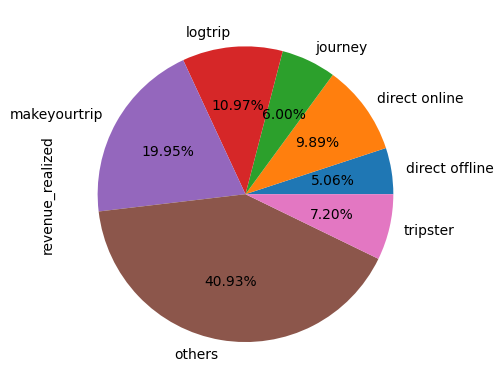

In [255]:
df_rev_per_platform = df_bookings.groupby("booking_platform")["revenue_realized"].sum()
df_rev_per_platform.plot(kind="pie", autopct="%.2f%%")